In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfea
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec

In [2]:
#---------------------------------------------------------------------------------------------------------------
#  city maskの枠だけを表示
#---------------------------------------------------------------------------------------------------------------
def draw_mask_sotowaku(extent, mask_cropped, ax=None, sotowaku_color='#dc143c', linewidth=3, zorder=0):
    """
    zorder = 0: デフォルトの最背面(gridをzorder=0に設定)
    zorder = 1: 赤色の外枠(citymask)
    zorder = 2: 白色の内枠が最前面(citymask)
    """

    # delta
    delta = 360/4320
    x_left = extent[0]
    y_top = extent[3]
    
    # outer
    upper_indices = []
    lower_indices = []
    left_indices = []
    right_indices = []
    rows, cols = mask_cropped.shape
    for i in range(rows):
        for j in range(cols):
            if mask_cropped[i, j] == 1:
                if mask_cropped[i-1, j] == 0:
                    upper_indices.append((i, j))
                if mask_cropped[i+1, j] == 0:
                    lower_indices.append((i, j))
                if mask_cropped[i, j-1] == 0:
                    left_indices.append((i, j))
                if mask_cropped[i, j+1] == 0:
                    right_indices.append((i, j))

    # extent
    projection = ccrs.PlateCarree()

    # city mask
    for up in upper_indices:
        x_index = x_left + delta*(up[1])
        y_index = y_top - delta*(up[0])
        ax.plot([x_index, x_index+delta], [y_index, y_index], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=zorder+1) # top
        ax.plot([x_index, x_index+delta], [y_index, y_index], color='white', transform=projection, linewidth=linewidth-2, zorder=zorder+2) # top
    for lo in lower_indices:
        x_index = x_left + delta*(lo[1])
        y_index = y_top - delta*(lo[0]+1)
        ax.plot([x_index, x_index+delta], [y_index, y_index], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=zorder+1) # bottom
        ax.plot([x_index, x_index+delta], [y_index, y_index], color='white', transform=projection, linewidth=linewidth-2, zorder=zorder+2) # bottom
    for le in left_indices:
        x_index = x_left + delta*(le[1])
        y_index = y_top - delta*(le[0]+1)
        ax.plot([x_index, x_index], [y_index, y_index+delta], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=zorder+1) # left
        ax.plot([x_index, x_index], [y_index, y_index+delta], color='white', transform=projection, linewidth=linewidth-2, zorder=zorder+2) # left
    for ri in right_indices:
        x_index = x_left + delta*(ri[1]+1)
        y_index = y_top - delta*(ri[0]+1)
        ax.plot([x_index, x_index], [y_index, y_index+delta], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=zorder+1) # right
        ax.plot([x_index, x_index], [y_index, y_index+delta], color='white', transform=projection, linewidth=linewidth-2, zorder=zorder+2) # right

    return ax

In [3]:
#
rgndir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region'
glbdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
#
city_num = 17
tag = '.ls5'
#
resolution = 12
POP='vld_cty_'
#
SUF = '.gl5'
dtype = 'float32'
gl5shape = (2160, 4320)
#
# region
left = -120
right = -116
bottom = 32
top = 36
#
nx, ny = (right - left)*resolution, (top - bottom)*resolution
rgnshape = (ny, nx)
img_extent = (left, right, bottom, top)
#
upperindex = (90-top)*resolution
lowerindex = (90-bottom)*resolution
leftindex = (180+left)*resolution
rightindex = (180+right)*resolution

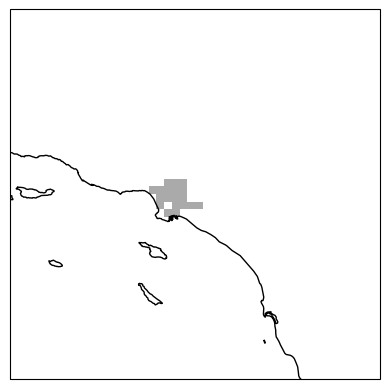

In [4]:
# city mask file
citymask = np.fromfile(f'{glbdir}/dat/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)

# crop
citymask_cropped = citymask[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
im = ax.imshow(citymask_cropped, extent=img_extent, transform=projection, cmap='gray_r', vmin=0, vmax=3)

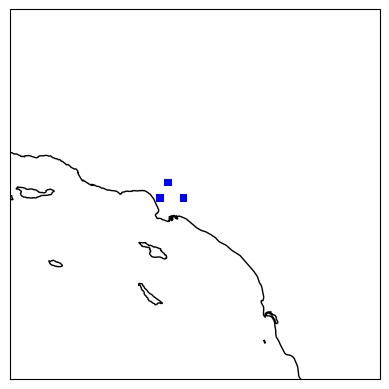

In [5]:
# intake file
josui = np.fromfile(f'{glbdir}/dat/cty_prf_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)

# crop
josui_cropped = josui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
josui_cmap = plt.cm.colors.ListedColormap(['white', 'blue'])
im = ax.imshow(josui_cropped, extent=img_extent, transform=projection, cmap=josui_cmap)

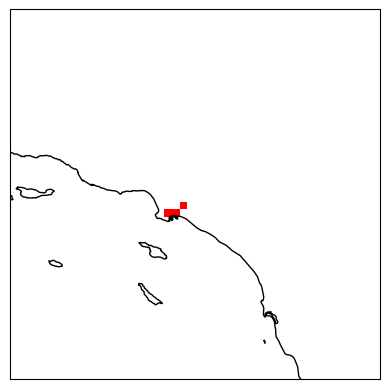

In [6]:
# gesui file
gesui = np.fromfile(f'{glbdir}/dat/cty_swg_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)

# crop
gesui_cropped = gesui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
gesui_cmap = plt.cm.colors.ListedColormap(['white', 'red'])
im = ax.imshow(gesui_cropped, extent=img_extent, transform=projection, cmap=gesui_cmap)

unq_ids: [4702.0, 14329.0, 4123.0]


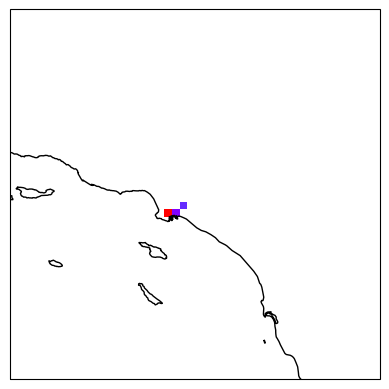

In [20]:
# rivnum file
rivnum = np.fromfile(f'{rgndir}/dat/riv_num_/rivnum.CAMA{tag}', dtype='float32').reshape(rgnshape)

# gesui rivnum
gesui_rivnum = np.where(gesui_cropped == 1, rivnum, 0)
gesui_rivnum = np.ma.masked_where(gesui_rivnum == 0, gesui_rivnum)
tmp = gesui_rivnum.flatten()
print(f'unq_ids: {[i for i in tmp if i > 0]}')

projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
im = ax.imshow(gesui_rivnum, extent=img_extent, transform=projection, cmap='rainbow')

unq_ids: [13206.0, 4123.0, 14329.0, 4702.0]


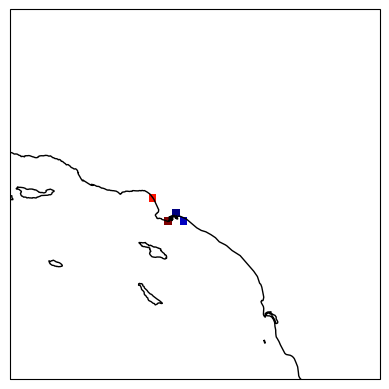

In [21]:
# rivnxl file
rivmou = np.fromfile(f'{rgndir}/dat/riv_mou_/rivmou.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivmou rivnum
rivmou_rivnum = np.where(rivmou == 9, rivnum, 0)
rivmou_rivnum = np.ma.masked_where(rivmou_rivnum == 0, rivmou_rivnum)
tmp = rivmou_rivnum.flatten()
print(f'unq_ids: {[i for i in tmp if i > 0]}')

projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
im = ax.imshow(rivmou_rivnum, extent=img_extent, transform=projection, cmap='jet')

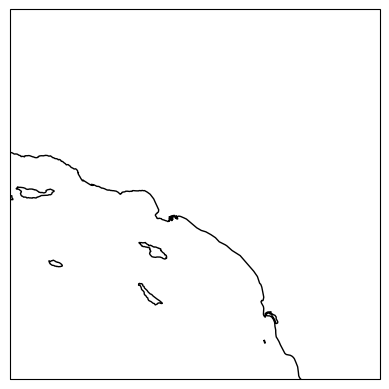

In [9]:
# intake file
aqueduct = np.fromfile(f'{glbdir}/dat/cty_int_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)

# crop
aqueduct_cropped = aqueduct[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
aqueduct_cmap = plt.cm.colors.ListedColormap(['white', 'limegreen'])
im = ax.imshow(aqueduct_cropped, extent=img_extent, transform=projection, cmap=aqueduct_cmap)

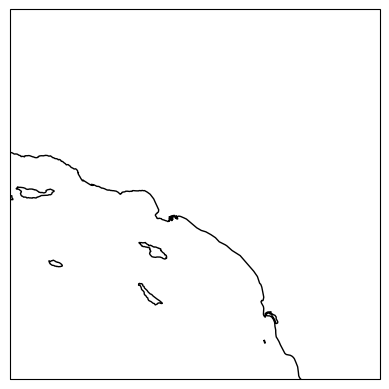

In [10]:
aqueduct_rivnum = np.where(aqueduct_cropped == 1, rivnum, 0)
aqueduct_rivnum = np.ma.masked_where(aqueduct_rivnum == 0, aqueduct_rivnum)

projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
im = ax.imshow(aqueduct_rivnum, extent=img_extent, transform=projection, cmap='rainbow')

gesui_rivnum unique_ids: [ 4123.  4702. 14329.]


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


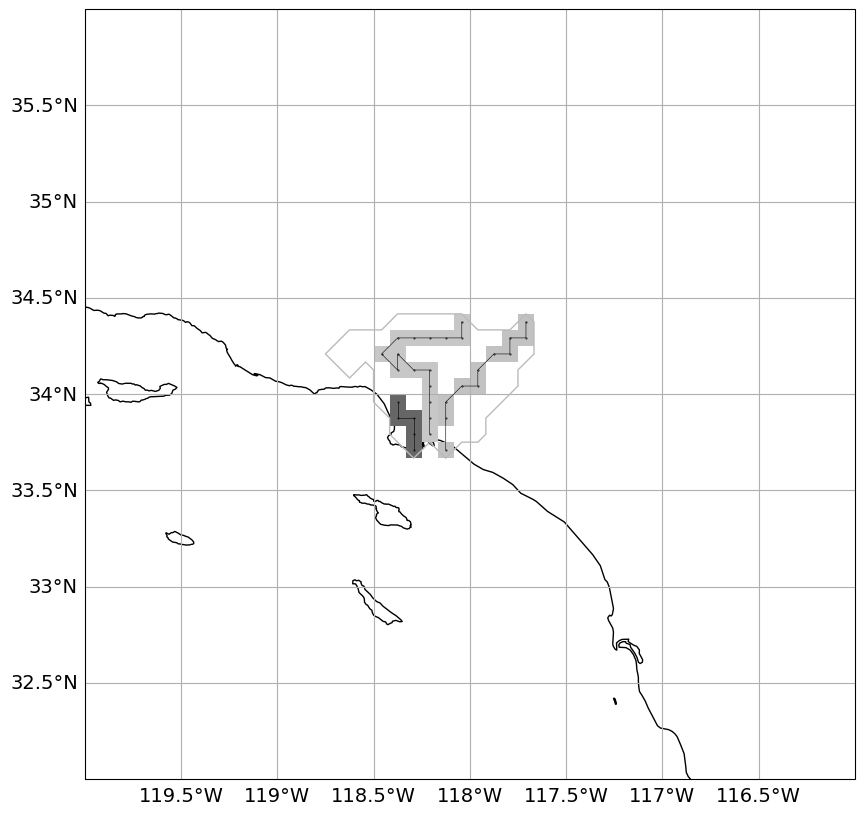

In [11]:
def l_coordinate_to_tuple(lcoordinate, a=2160, b=4320):
    lat_l = ((lcoordinate - 1) // b)
    lon_l = (lcoordinate) % b - 1
    return (lat_l, lon_l)

# rivnxl file
rivmou = np.fromfile(f'{rgndir}/dat/riv_mou_/rivmou.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivnxl file
rivnxl = np.fromfile(f'{rgndir}/dat/riv_nxl_/rivnxl.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivara file
rivara = np.fromfile(f'{rgndir}/dat/riv_ara_/rivara.CAMA{tag}', dtype='float32').reshape(rgnshape)

# l coordinate >>> xy coordinate
vfunc = np.vectorize(l_coordinate_to_tuple, otypes=[tuple])
result = np.empty(rivnxl.shape, dtype=tuple)
mask = ~np.isnan(rivnxl)
result[mask] = vfunc(rivnxl[mask], a=ny, b=nx)

# make result_array (48, 36, 2) with xy mesh data
result_list = []
for row in result:
    for x, y in row:
        result_list.append((x, y))
result_shape = (result.shape[0], result.shape[1], 2)
result_array = np.array(result_list).reshape(result_shape)
result_array = result_array.astype(int)

# prepare empty variables
result_dict = {}
unique_ids = np.unique(gesui_rivnum).compressed()
print(f'gesui_rivnum unique_ids: {unique_ids}')
riv_path_array = np.ma.masked_all(gesui_rivnum.shape, dtype='float32')
visited_coords = set()

# basin number loop
for uid in unique_ids:
    coords_a = np.argwhere(rivmou_rivnum == uid)
    riv_path_array[coords_a[0][0], coords_a[0][1]] = uid
    if coords_a.size > 0:
        target_coord = tuple(coords_a[0])
        path_coords = [target_coord]
        for _ in range(300):
            if target_coord in visited_coords:
                break
            visited_coords.add(target_coord)
            matched_coords = np.argwhere(np.all(target_coord == result_array, axis=2))
            if len(matched_coords) == 0:
                break
            # choose max rivara among mached indicies
            unvisited_matched = [tuple(coord) for coord in matched_coords if tuple(coord) not in visited_coords]
            if not unvisited_matched:
                break
            rivara_values = [rivara[coord[0], coord[1]] for coord in unvisited_matched]
            max_index = np.argmax(rivara_values)
            best_coord = unvisited_matched[max_index]
            riv_path_array[best_coord[0], best_coord[1]] = uid
            target_coord = best_coord
            path_coords.append(target_coord)
        result_dict[uid] = path_coords
#
plt.rcParams["font.size"] = 14
fig = plt.figure(figsize=(10, 10))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent, projection)
#
landmask = np.fromfile(f'{rgndir}/dat/lnd_msk_/lndmsk.CAMA{tag}', dtype='float32').reshape(rgnshape)
contour = ax.contour(landmask, levels=[0.5], colors='#BBBBBB', linewidths=1, origin='upper', extent=img_extent, transform=projection, zorder=10)
#
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfea.OCEAN, color='#FFFFFF')
ax.add_feature(cfea.LAKES, color='#FFFFFF')
#
vmin = np.min(riv_path_array) - 1e4
vmax = np.max(riv_path_array) + 1e4
img = ax.imshow(riv_path_array, extent=img_extent, transform=projection, cmap='Greys', vmin=vmin, vmax=vmax, zorder=2)
#
if result_dict is not None:
    for key, path in result_dict.items():
        lat_coords, lon_coords = zip(*path)

        # xy coordinate >>> lonlat coordinate
        lat_coords = [(top - lat/resolution - 1/(resolution*2)) for lat in lat_coords]
        lon_coords = [(left + lon/resolution + 1/(resolution*2)) for lon in lon_coords]
        ax.plot(lon_coords, lat_coords, marker='o', markersize=0.4, color='black', linestyle='-', linewidth=.4, transform=projection, zorder=5)
#
#fig.colorbar(img, ax=ax)

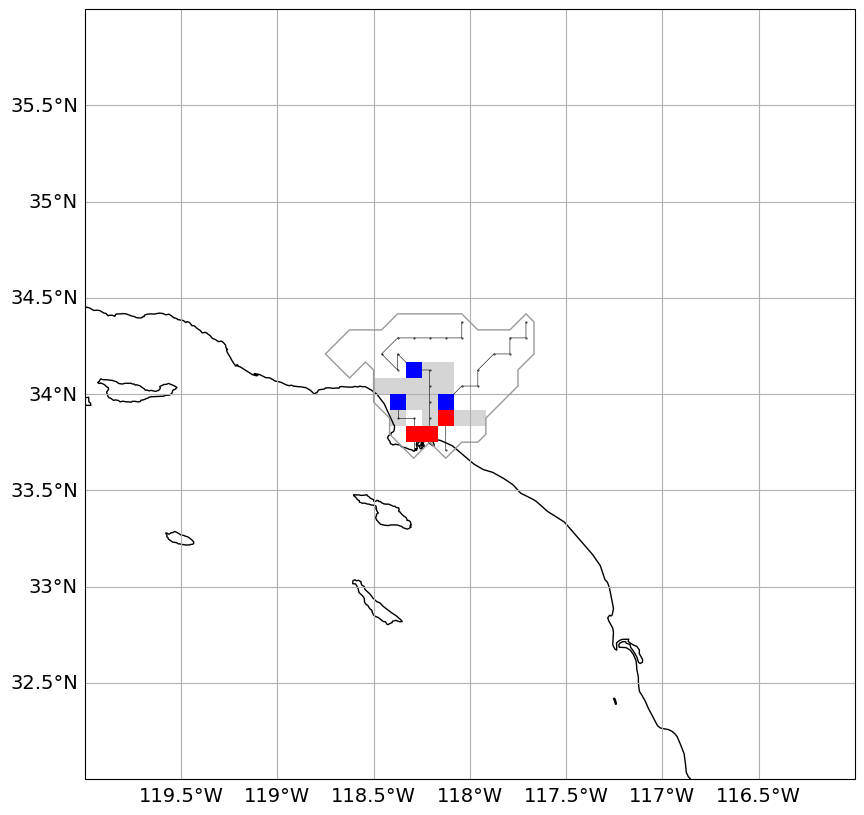

In [12]:
#
plt.rcParams["font.size"] = 14
fig = plt.figure(figsize=(10, 10))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent, projection)
#
im1 = ax.imshow(citymask_cropped, extent=img_extent, transform=projection, cmap='gray_r', vmin=0, vmax=6)
#
landmask = np.fromfile(f'{rgndir}/dat/lnd_msk_/lndmsk.CAMA{tag}', dtype='float32').reshape(rgnshape)
contour = ax.contour(landmask, levels=[0.5], colors='#999999', linewidths=1, origin='upper', extent=img_extent, transform=projection, zorder=10)
#
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfea.OCEAN, color='#FFFFFF')
ax.add_feature(cfea.LAKES, color='#FFFFFF')
#
vmin = np.min(riv_path_array) - 1e5
vmax = np.max(riv_path_array) + 1e6
#img = ax.imshow(riv_path_array, extent=img_extent, transform=projection, cmap='Greys', vmin=vmin, vmax=vmax, zorder=4)
#
if result_dict is not None:
    for key, path in result_dict.items():
        lat_coords, lon_coords = zip(*path)

        # xy coordinate >>> lonlat coordinate
        lat_coords = [(top - lat/resolution - 1/(resolution*2)) for lat in lat_coords]
        lon_coords = [(left + lon/resolution + 1/(resolution*2)) for lon in lon_coords]
        ax.plot(lon_coords, lat_coords, marker='o', markersize=0.4, color='black', linestyle='-', linewidth=.4, transform=projection, zorder=5)
#
josui_cropped = np.ma.masked_where(josui_cropped == 0, josui_cropped)
im2 = ax.imshow(josui_cropped, extent=img_extent, transform=projection, cmap=josui_cmap, vmin=0, zorder=8)
#
gesui_cropped = np.ma.masked_where(gesui_cropped == 0, gesui_cropped)
im2 = ax.imshow(gesui_cropped, extent=img_extent, transform=projection, cmap=gesui_cmap, vmin=0, zorder=8)

gesui_intake_masked unique_ids: [ 4123.  4702. 14329.]
rivmou_rivnum unique_ids: [13206.0, 4123.0, 14329.0, 4702.0]


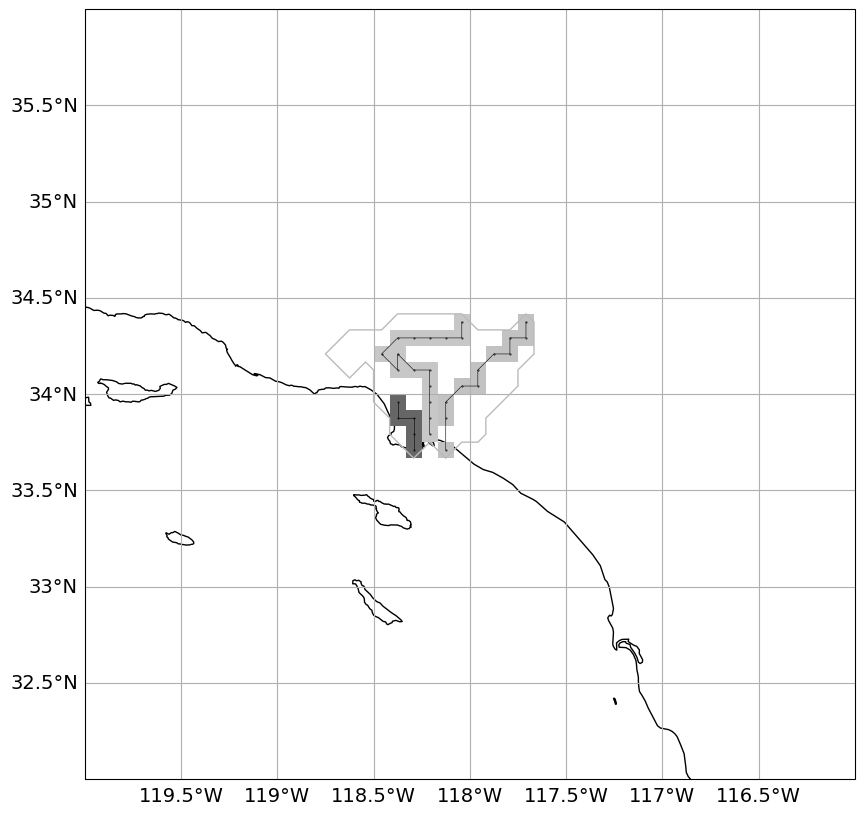

In [25]:
def l_coordinate_to_tuple(lcoordinate, a=2160, b=4320):
    lat_l = ((lcoordinate - 1) // b)
    lon_l = (lcoordinate) % b - 1
    return (lat_l, lon_l)
    
# rivnxl file
rivnxl = np.fromfile(f'{rgndir}/dat/riv_nxl_/rivnxl.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivara file
rivara = np.fromfile(f'{rgndir}/dat/riv_ara_/rivara.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivnum file
rivnum = np.fromfile(f'{rgndir}/dat/riv_num_/rivnum.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivmou file
rivmou = np.fromfile(f'{rgndir}/dat/riv_mou_/rivmou.CAMA{tag}', dtype='float32').reshape(rgnshape)
rivmou_rivnum = np.where(rivmou == 9, rivnum, 0)
rivmou_rivnum = np.ma.masked_where(rivmou_rivnum == 0, rivmou_rivnum)

# josui file
josui = np.fromfile(f'{glbdir}/dat/cty_prf_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
josui_cropped = josui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

# gesui rivnum 
gesui = np.fromfile(f'{glbdir}/dat/cty_swg_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
gesui_cropped = gesui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
gesui_rivnum = np.where(gesui_cropped == 1, rivnum, 0)

# intake file
intake = np.fromfile(f'{glbdir}/dat/cty_int_/fig/intake_display_{POP}_{city_num:08}{SUF}', dtype='float32').reshape(gl5shape)
intake_cropped = intake[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

# intake rivnum
uid_intake = np.unique(np.where(intake_cropped == 1, rivnum, 0))[1]
intake_rivmou = np.where(rivmou_rivnum == uid_intake, rivnum, 0)

# gesui plus intake rivmou points
unique_rivnum = np.unique(gesui_rivnum)
unique_intake = np.unique(intake_rivmou)
combined_unique_ids = np.unique(np.concatenate((unique_rivnum, unique_intake)))
unique_ids = combined_unique_ids[combined_unique_ids > 0]
print(f'gesui_intake_masked unique_ids: {unique_ids}')
tmp = rivmou_rivnum.flatten()
print(f'rivmou_rivnum unique_ids: {[i for i in tmp if i > 0]}')

# l coordinate >>> xy coordinate
vfunc = np.vectorize(l_coordinate_to_tuple, otypes=[tuple])
result = np.empty(rivnxl.shape, dtype=tuple)
mask = ~np.isnan(rivnxl)
result[mask] = vfunc(rivnxl[mask], a=ny, b=nx)

# make result_array (48, 36, 2) with xy mesh data
result_list = []
for row in result:
    for x, y in row:
        result_list.append((x, y))
result_shape = (result.shape[0], result.shape[1], 2)
result_array = np.array(result_list).reshape(result_shape)
result_array = result_array.astype(int)

# prepare empty variables
result_dict = {}
riv_path_array = np.ma.masked_all(gesui_intake_masked.shape, dtype='float32')
visited_coords = set()

# basin number loop
for uid in unique_ids:
    coords_a = np.argwhere(rivmou_rivnum == uid)
    if coords_a.size > 0:
        riv_path_array[coords_a[0][0], coords_a[0][1]] = uid
        target_coord = tuple(coords_a[0])
        path_coords = [target_coord]
        for _ in range(300):
            if target_coord in visited_coords:
                break
            visited_coords.add(target_coord)
            matched_coords = np.argwhere(np.all(target_coord == result_array, axis=2))
            if len(matched_coords) == 0:
                break
            # choose max rivara among mached indicies
            unvisited_matched = [tuple(coord) for coord in matched_coords if tuple(coord) not in visited_coords]
            if not unvisited_matched:
                break
            rivara_values = [rivara[coord[0], coord[1]] for coord in unvisited_matched]
            max_index = np.argmax(rivara_values)
            best_coord = unvisited_matched[max_index]
            riv_path_array[best_coord[0], best_coord[1]] = uid
            target_coord = best_coord
            path_coords.append(target_coord)
        result_dict[uid] = path_coords
#
plt.rcParams["font.size"] = 14
fig = plt.figure(figsize=(10, 10))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent, projection)
#
landmask = np.fromfile(f'{rgndir}/dat/lnd_msk_/lndmsk.CAMA{tag}', dtype='float32').reshape(rgnshape)
contour = ax.contour(landmask, levels=[0.5], colors='#BBBBBB', linewidths=1, origin='upper', extent=img_extent, transform=projection, zorder=10)
#
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfea.OCEAN, color='#FFFFFF')
ax.add_feature(cfea.LAKES, color='#FFFFFF')
#
vmin = np.min(riv_path_array) - 1e4
vmax = np.max(riv_path_array) + 1e4
img = ax.imshow(riv_path_array, extent=img_extent, transform=projection, cmap='Greys', vmin=vmin, vmax=vmax, zorder=2)
#
if result_dict is not None:
    for key, path in result_dict.items():
        lat_coords, lon_coords = zip(*path)

        # xy coordinate >>> lonlat coordinate
        lat_coords = [(top - lat/resolution - 1/(resolution*2)) for lat in lat_coords]
        lon_coords = [(left + lon/resolution + 1/(resolution*2)) for lon in lon_coords]
        ax.plot(lon_coords, lat_coords, marker='o', markersize=0.4, color='black', linestyle='-', linewidth=.4, transform=projection, zorder=5)
#
#fig.colorbar(img, ax=ax)

<GeoAxes: >

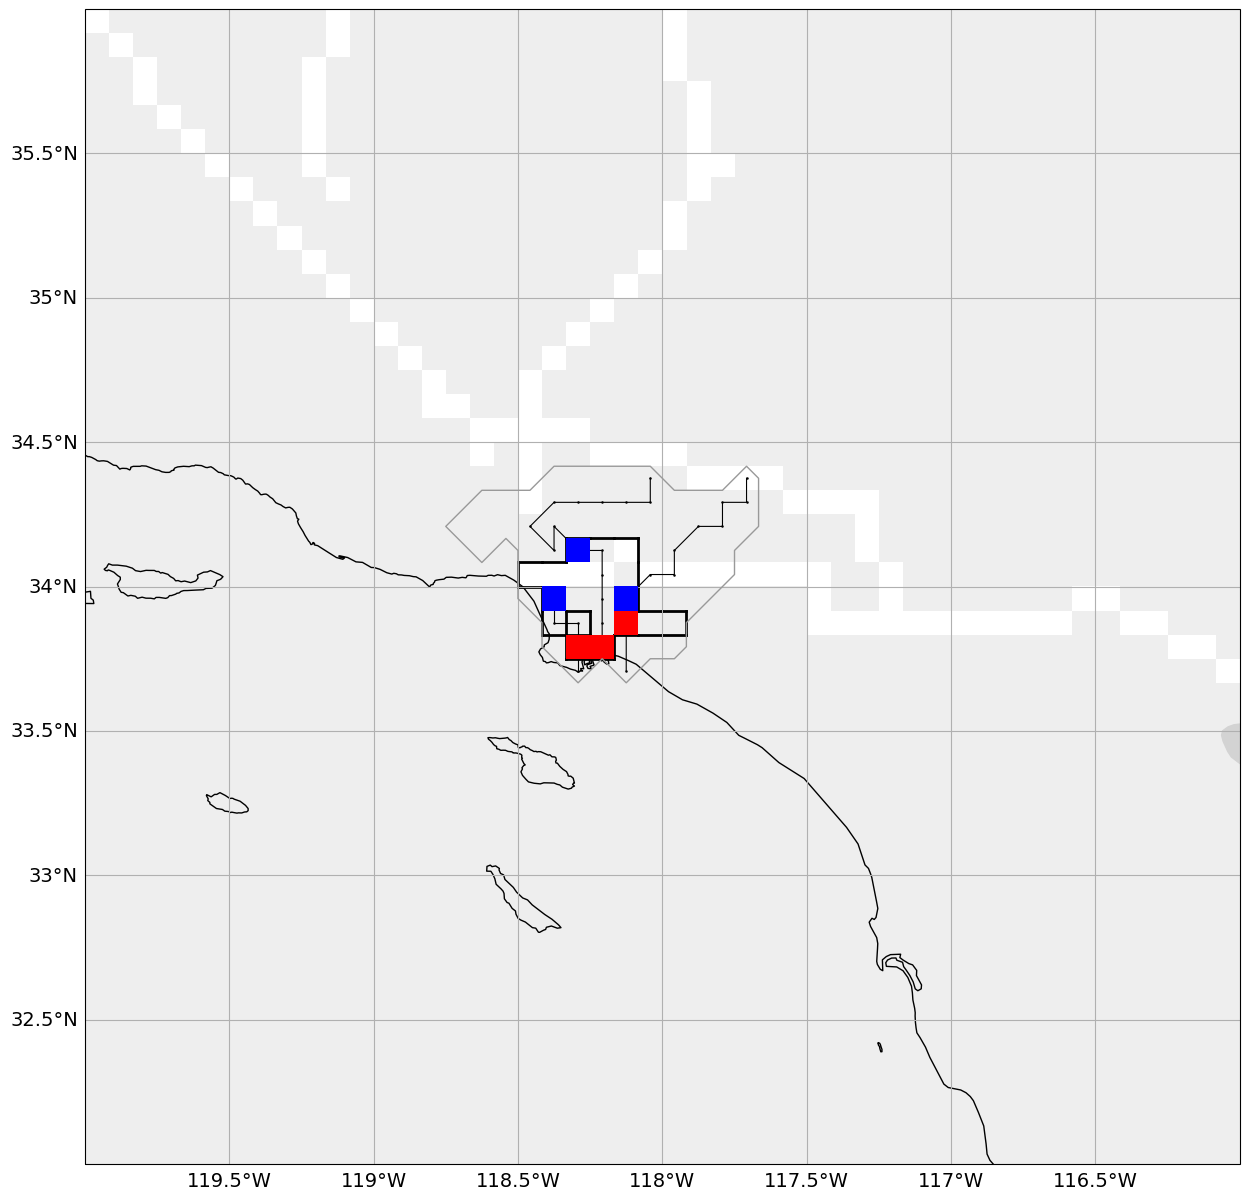

In [26]:
#
# 1: explored area
# 2: candidate points
# 3: intake rivnum
# 4: city mask
# 5: city_center
# 6: intake point
cm = colors.ListedColormap(["#EEEEEE", "#BBBBBB"])
#
plt.rcParams["font.size"] = 14
fig = plt.figure(figsize=(15, 15))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent, projection)
#
im1 = ax.imshow(citymask_cropped, extent=img_extent, transform=projection, cmap='gray_r', vmin=1, vmax=2)
#
landmask = np.fromfile(f'{rgndir}/dat/lnd_msk_/lndmsk.CAMA{tag}', dtype='float32').reshape(rgnshape)
contour = ax.contour(landmask, levels=[0.5], colors='#999999', linewidths=1, origin='upper', extent=img_extent, transform=projection, zorder=10)
#
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfea.OCEAN, color='#FFFFFF')
ax.add_feature(cfea.LAKES, color='#d3d3d3')
#
vmin = np.min(riv_path_array) - 1e5
vmax = np.max(riv_path_array) + 1e6
#img = ax.imshow(riv_path_array, extent=img_extent, transform=projection, cmap='Greys', vmin=vmin, vmax=vmax, zorder=4)
#
if result_dict is not None:
    for key, path in result_dict.items():
        lat_coords, lon_coords = zip(*path)

        # xy coordinate >>> lonlat coordinate
        lat_coords = [(top - lat/resolution - 1/(resolution*2)) for lat in lat_coords]
        lon_coords = [(left + lon/resolution + 1/(resolution*2)) for lon in lon_coords]
        ax.plot(lon_coords, lat_coords, marker='o', markersize=0.8, color='black', linestyle='-', linewidth=.8, transform=projection, zorder=5)
#
josui_cropped = np.ma.masked_where(josui_cropped == 0, josui_cropped)
im2 = ax.imshow(josui_cropped, extent=img_extent, transform=projection, cmap=josui_cmap, vmin=0, zorder=8)
#
gesui_cropped = np.ma.masked_where(gesui_cropped == 0, gesui_cropped)
im2 = ax.imshow(gesui_cropped, extent=img_extent, transform=projection, cmap=gesui_cmap, vmin=0, zorder=8)
#
intake = np.fromfile(f'{glbdir}/dat/cty_int_/fig/intake_display_{POP}_{city_num:08}{SUF}', dtype='float32').reshape(gl5shape)
intake_cropped = intake[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
intake_masked = np.ma.masked_where(intake_cropped==0, intake_cropped)
intake_masked = np.ma.masked_where(intake_cropped==0, intake_cropped)
im3 = ax.imshow(intake_masked, extent=img_extent, transform=projection, cmap=cm, vmin=1, vmax=2, zorder=0)
draw_mask_sotowaku(img_extent, citymask_cropped, ax=ax, sotowaku_color='black', linewidth=2, zorder=-1)

gesui_intake_masked unique_ids: [ 4123.  4702. 14329.]
rivmou_rivnum unique_ids: [13206.0, 4123.0, 14329.0, 4702.0]
[ 4123.  4702. 14329.]


<GeoAxes: >

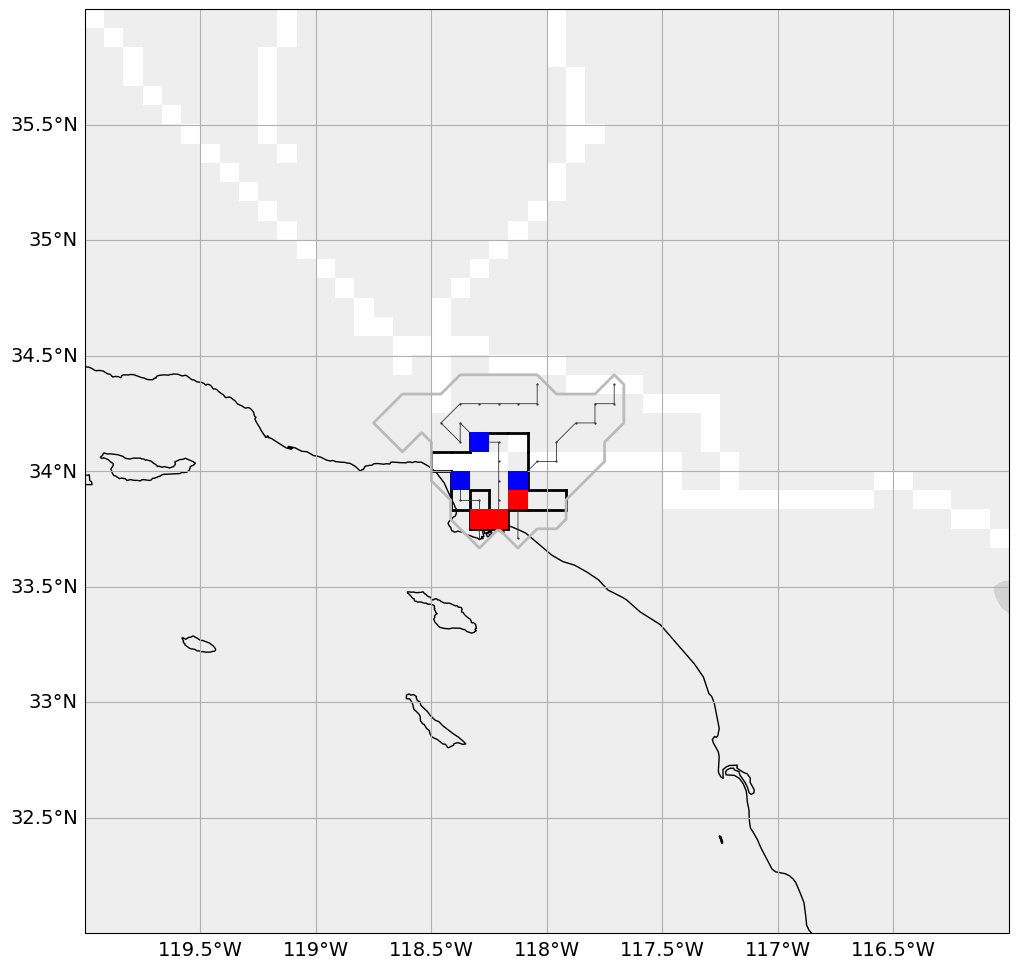

In [31]:
#----------------------------------------------------------------------------------------------------------------------------------------------------

# landmask file
landmask = np.fromfile(f'{rgndir}/dat/lnd_msk_/lndmsk.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivnxl file
rivnxl = np.fromfile(f'{rgndir}/dat/riv_nxl_/rivnxl.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivara file
rivara = np.fromfile(f'{rgndir}/dat/riv_ara_/rivara.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivnum file
rivnum = np.fromfile(f'{rgndir}/dat/riv_num_/rivnum.CAMA{tag}', dtype='float32').reshape(rgnshape)

# rivmou file
rivmou = np.fromfile(f'{rgndir}/dat/riv_mou_/rivmou.CAMA{tag}', dtype='float32').reshape(rgnshape)
rivmou_rivnum = np.where(rivmou == 9, rivnum, 0)
rivmou_rivnum = np.ma.masked_where(rivmou_rivnum == 0, rivmou_rivnum)

# josui file
josui = np.fromfile(f'{glbdir}/dat/cty_prf_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
josui_cropped = josui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

# aqueduct file
aqueduct = np.fromfile(f'{glbdir}/dat/cty_int_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
aqueduct_cropped = aqueduct[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

# gesui file 
gesui = np.fromfile(f'{glbdir}/dat/cty_swg_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
gesui_cropped = gesui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
gesui_rivnum = np.where(gesui_cropped == 1, rivnum, 0)

# intake file
intake = np.fromfile(f'{glbdir}/dat/cty_int_/fig/intake_display_{POP}_{city_num:08}{SUF}', dtype='float32').reshape(gl5shape)
intake_cropped = intake[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]

# gesui + intake rivnum
uid_intake = np.unique(np.where(intake_cropped == 1, rivnum, 0))[1]
intake_rivmou = np.where(rivmou_rivnum == uid_intake, rivnum, 0)
gesui_rivnum = np.where(gesui_cropped == 1, rivnum, 0)

# gesui rivnum + intake rivmou points
unique_rivnum = np.unique(gesui_rivnum)
unique_intake = np.unique(intake_rivmou)
combined_unique_ids = np.unique(np.concatenate((unique_rivnum, unique_intake)))
unique_ids = combined_unique_ids[combined_unique_ids > 0]
print(f'gesui_intake_masked unique_ids: {unique_ids}')
tmp = rivmou_rivnum.flatten()
print(f'rivmou_rivnum unique_ids: {[i for i in tmp if i > 0]}')

#----------------------------------------------------------------------------------------------------------------------------------------------------

def l_coordinate_to_tuple(lcoordinate, a=2160, b=4320):
    lat_l = ((lcoordinate - 1) // b)
    lon_l = (lcoordinate) % b - 1
    return (lat_l, lon_l)
    
# l coordinate >>> xy coordinate
vfunc = np.vectorize(l_coordinate_to_tuple, otypes=[tuple])
result = np.empty(rivnxl.shape, dtype=tuple)
mask = ~np.isnan(rivnxl)
result[mask] = vfunc(rivnxl[mask], a=ny, b=nx)

# make result_array (48, 36, 2) with xy mesh data
result_list = []
for row in result:
    for x, y in row:
        result_list.append((x, y))
result_shape = (result.shape[0], result.shape[1], 2)
result_array = np.array(result_list).reshape(result_shape)
result_array = result_array.astype(int)

# prepare empty variables
result_dict = {}
riv_path_array = np.ma.masked_all(gesui_intake_masked.shape, dtype='float32')
visited_coords = set()
print(unique_ids)

# basin number loop
for uid in unique_ids:
    coords_a = np.argwhere(rivmou_rivnum == uid)
    if coords_a.size > 0:
        riv_path_array[coords_a[0][0], coords_a[0][1]] = uid
        target_coord = tuple(coords_a[0])
        path_coords = [target_coord]
        for _ in range(300):
            if target_coord in visited_coords:
                break
            visited_coords.add(target_coord)
            matched_coords = np.argwhere(np.all(target_coord == result_array, axis=2))
            if len(matched_coords) == 0:
                break
            unvisited_matched = [tuple(coord) for coord in matched_coords if tuple(coord) not in visited_coords]
            if not unvisited_matched:
                break
            rivara_values = [rivara[coord[0], coord[1]] for coord in unvisited_matched]
            max_index = np.argmax(rivara_values)
            best_coord = unvisited_matched[max_index]
            riv_path_array[best_coord[0], best_coord[1]] = uid
            target_coord = best_coord
            path_coords.append(target_coord)
        result_dict[uid] = path_coords
        
#----------------------------------------------------------------------------------------------------------------------------------------------------

plt.rcParams["font.size"] = 14
fig = plt.figure(figsize=(12, 12))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent, projection)
#
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfea.OCEAN, color='#FFFFFF')
ax.add_feature(cfea.LAKES, color='#d3d3d3')
#
# 1: explored area
# 2: candidate points
# 3: intake rivnum
# 4: city mask
# 5: city_center
# 6: intake point
#
cm = colors.ListedColormap(["#EEEEEE", "#BBBBBB"])
josui_cmap = plt.cm.colors.ListedColormap(['white', 'blue'])
gesui_cmap = plt.cm.colors.ListedColormap(['white', 'red'])
aqueduct_cmap = plt.cm.colors.ListedColormap(['white', 'limegreen'])
#
im1 = ax.contour(landmask, levels=[0.5], colors='#BBBBBB', linewidths=2, origin='upper', extent=img_extent, transform=projection)
#
if result_dict is not None:
    for key, path in result_dict.items():
        lat_coords, lon_coords = zip(*path)

        # xy coordinate >>> lonlat coordinate
        lat_coords = [(top - lat/resolution - 1/(resolution*2)) for lat in lat_coords]
        lon_coords = [(left + lon/resolution + 1/(resolution*2)) for lon in lon_coords]
        ax.plot(lon_coords, lat_coords, marker='o', markersize=0.6, color='#333333', linestyle='-', linewidth=.6, transform=projection, zorder=5)
        
josui_cropped = np.ma.masked_where(josui_cropped == 0, josui_cropped)
im2 = ax.imshow(josui_cropped, extent=img_extent, transform=projection, cmap=josui_cmap, vmin=0, zorder=8)
#
gesui_cropped = np.ma.masked_where(gesui_cropped == 0, gesui_cropped)
im2 = ax.imshow(gesui_cropped, extent=img_extent, transform=projection, cmap=gesui_cmap, vmin=0, zorder=8)
#
aqueduct_cropped = np.ma.masked_where(aqueduct_cropped == 0, aqueduct_cropped)
im3 = ax.imshow(aqueduct_cropped, extent=img_extent, transform=projection, cmap=aqueduct_cmap, vmin=0, zorder=8)
#
intake_masked = np.ma.masked_where(intake_cropped==0, intake_cropped)
im4 = ax.imshow(intake_masked, extent=img_extent, transform=projection, cmap=cm, vmin=1, vmax=2, zorder=0)

draw_mask_sotowaku(img_extent, citymask_cropped, ax=ax, sotowaku_color='black', linewidth=2, zorder=-1)